<a href="https://colab.research.google.com/github/rajeshaiml/machine-learning/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

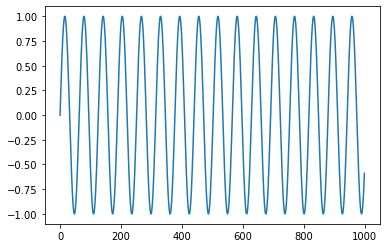

In [61]:
#Set the data
series=np.sin(0.1*np.arange(1000))
plt.plot(series)

In [11]:
len(series)

1000

In [16]:
series[10]

array([0.19866933, 0.29552021, 0.38941834, 0.47942554, 0.56464247,
       0.64421769, 0.71735609, 0.78332691, 0.84147098, 0.89120736])

In [62]:
#Make the dataset
T=10
X=[]
Y=[]
k=len(series)
for t in range(k-T):
 # print(t,t+T, t+T)
  x=series[t:t+T] #0-10 1-11 2-12
  X.append(x)
  y=series[t+T] #10 11 12
  Y.append(y)

In [23]:
len(X)

990

In [63]:
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
print('Shape of X: {} and the Shape of Y: {}'.format(X.shape,Y.shape))

Shape of X: (990, 10, 1) and the Shape of Y: (990,)


In [64]:
#Autoregressive RNN model
i=Input(shape=(T,1))
x=SimpleRNN(15,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)

In [65]:
model.compile(loss='mse',optimizer=Adam(lr=0.001))

In [38]:
X[:-k//2].shape

(490, 10, 1)

In [66]:
r=model.fit(X[:-k//2],Y[:-k//2],
            epochs=80,
            validation_data=(X[-k//2:],Y[-k//2:]))

Epoch 1/80
16/16 [==============================] - 0s 16ms/step - loss: 0.4697 - val_loss: 0.3850
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.3309 - val_loss: 0.2531
Epoch 3/80
16/16 [==============================] - 0s 5ms/step - loss: 0.2122 - val_loss: 0.1593
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.1261 - val_loss: 0.0881
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0666 - val_loss: 0.0409
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0180
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.0089
Epoch 8/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 9/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 10/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 11/80
16/16 

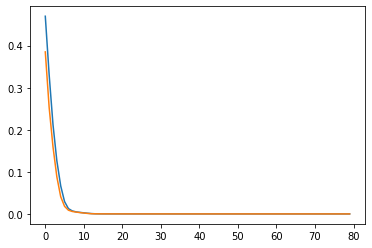

In [67]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val Loss')

In [79]:
#Forecast using true targets
validation_target=Y[-k//2:]
validation_predictions=[]

i=-k//2

while len(validation_predictions) < len(validation_target):
  p=model.predict(X[i].reshape(1,-1,1))[0,0]
  i+=1
  validation_predictions.append(p)

In [77]:
validation_predictions[0]

array([[0.04779668]], dtype=float32)

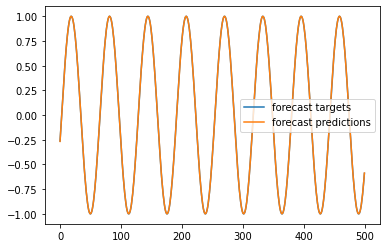

In [85]:
plt.plot(validation_target,label='forecast targets')
plt.plot(validation_predictions,label='forecast predictions')
plt.legend()
plt.show()